In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
x = np.array([50, 60, 70, 80, 90])                           # x is represent volume of house in square meters
y = np.array([150, 180, 210, 240, 270])                      # y is represent price of house in thousands of dollars

## Linear Regression class

In [12]:
class Regression:
    """ 
    A class that implements linear regression, lasso regression, and ridge regression using gradient descent optimization.
    The class has methods for training the model, making predictions, plotting the training process, and calculating the mean squared error (MSE) of the model on given data.
    Attributes:
    learning_rate: A float representing the learning rate for gradient descent optimization.
    n_iters: An integer representing the number of iterations for training the model.
    theta_0: A float representing the slope (coefficient) of the linear regression model.
    theta_1: A float representing the bias (intercept) of the linear regression model.
    sse_values: A list that stores the sum of squared errors (SSE) values during the training process for each iteration.
    Methods:
    __init__(self, learning_rate=0.001, n_iters=100): Initializes the Regression class with the specified learning rate and number of iterations, and initializes the model parameters and SSE values.
    fit(self, x, y, model_name): Trains the specified regression model (linear, lasso, ridge, or polynomial) using the input data x and target values y, and updates the model parameters (theta_0 and theta_1) to minimize the SSE.
    predict(self, x): Predicts the target values for the given input data x using the learned parameters of the model.
    plot_training(self, x, y): Plots the training process of the model, showing the SSE over iterations and the fitted regression line along with the original data points.
    mean_squared_error(self, x, y): Calculates and returns the mean squared error (MSE) of the model on the given data by comparing the predicted values with the actual target values.
    """
    def __init__(self ,learning_rate = .001 ,n_iters = 100):
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.theta_0 = 0  # slope
        self.theta_1 = 0  # bias
        self.sse_values = []


    def fit(self,x,y,model_name ):
        """ 
        Trains the specified regression model (linear, lasso, ridge or polynomial) using the input data x and target values y, and updates the model parameters (theta_0 and theta_1) to minimize the sum of squared errors (SSE).
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features (e.g., size of the house).
        y: A numpy array of shape (n_samples,) representing the target values (e.g., price of the house).
        model_name: A string indicating the type of regression model to train. It can be "Linear Regression", "Lasso Regression", "Ridge Regression", or "Polynomial Regression". 
        The method uses gradient descent optimization to update the model parameters based on the specified regression type, and stores the SSE values for each iteration to track the training process.
        """
        if model_name == "Linear Regression":
            print("Training Linear Regression model...")
            n = len(x)
            self.theta_0 = 0
            self.theta_1 = 0

            for i in range(self.n_iters):
                y_hat = self.theta_0*x + self.theta_1

                D_0 = 2/n * np.sum((y_hat-y)*x)
                D_1 = 2/n * np.sum(y_hat-y)

                self.theta_0 -= self.learning_rate * D_0
                self.theta_1 -= self.learning_rate * D_1
                
                sse = np.sum((y_hat - y)**2)
                self.sse_values.append(sse)
            
            print(f"Optimixed param : slop = {self.theta_0}, bias ={self.theta_1}")

        elif model_name == "lasso Regression":
            print("Training Lasso Regression model...")
            n = len(x)
            self.theta_0 = 0
            self.theta_1 = 0

            for i in range(self.n_iters):
                y_hat = self.theta_0*x + self.theta_1

                D_0 = 2/n * np.sum((y_hat-y)*x) + 0.01 * np.sign(self.theta_0)
                D_1 = 2/n * np.sum(y_hat-y) + 0.01 * np.sign(self.theta_1)

                self.theta_0 -= self.learning_rate * D_0
                self.theta_1 -= self.learning_rate * D_1
                
                sse = np.sum((y_hat - y)**2)
                self.sse_values.append(sse)
            
            print(f"Optimixed param : slop = {self.theta_0}, bias ={self.theta_1}")

        elif model_name == "Ridge Regression":
            print("Training Ridge Regression model...")
            n = len(x)
            self.theta_0 = 0
            self.theta_1 = 0

            for i in range(self.n_iters):
                y_hat = self.theta_0*x + self.theta_1

                D_0 = 2/n * np.sum((y_hat-y)*x) + 0.01 * self.theta_0
                D_1 = 2/n * np.sum(y_hat-y) + 0.01 * self.theta_1

                self.theta_0 -= self.learning_rate * D_0
                self.theta_1 -= self.learning_rate * D_1
                
                sse = np.sum((y_hat - y)**2)
                self.sse_values.append(sse)
            
            print(f"Optimixed param : slop = {self.theta_0}, bias ={self.theta_1}")

        elif model_name == "Polynomial Regression":
            print("Training Polynomial Regression model...")
            x = x / np.max(x)
            n = len(x)
            self.theta_0 = 0
            self.theta_1 = 0

            for i in range(self.n_iters):
                y_hat = self.theta_0*x**2 + self.theta_1

                D_0 = 2/n * np.sum((y_hat-y)*x**2)
                D_1 = 2/n * np.sum(y_hat-y)

                self.theta_0 -= self.learning_rate * D_0
                self.theta_1 -= self.learning_rate * D_1
                
                sse = np.sum((y_hat - y)**2)
                self.sse_values.append(sse)
            
            print(f"Optimixed param : slop = {self.theta_0}, bias ={self.theta_1}")


    def predict(self, x):
        """ 
        Predicts the target values for the given input data x using the learned parameters of the model.
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features (e.g., size of the house).
        Returns:
        A numpy array of shape (n_samples,) representing the predicted target values (e.g., price of the house) based on the learned parameters of the model. 
        The method uses the formula of linear regression to calculate the predicted values by applying the learned slope (theta_0) and bias (theta_1) to the input features x.
        """
        return self.theta_0*x + self.theta_1

    def plot_training(self,x,y):
        """ 
        Plots the training process of the model, showing the sum of squared errors (SSE) over iterations and the fitted regression line along with the original data points.
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features (e.g., size of the house).
        y: A numpy array of shape (n_samples,) representing the actual target values (e.g., price of the house).
        The method creates two subplots:
        The first subplot shows the SSE values over iterations, with the x-axis representing the number of iterations and the y-axis representing the SSE values. 
        The second subplot shows a scatter plot of the original data points (x, y) in red and the fitted regression line based on the learned parameters (theta_0 and theta_1) in blue. 
        The x-axis of the second subplot represents the input features (size of the house), and the y-axis represents the target values (price of the house). 
        The method also includes titles, labels, and legends for both subplots to enhance the visualization of the training process and the fitted regression line. 
        Finally, it displays the plots using plt.show().
        """
        plt.figure(figsize=(12,5))
        plt.subplot(1,2,1)
        plt.plot(range(self.n_iters),self.sse_values, label = "sse")
        plt.xlabel("Iterations")
        plt.ylabel("SSE")
        plt.title("SSE over Iteration")
        plt.legend()

        plt.subplot(1,2,2)
        plt.scatter(x ,y ,color = "red", label = "Data points")
        plt.plot(x ,self.theta_0*x + self.theta_1 ,color = "blue", label = "Regression line")
        plt.xlabel("Size (m²)")
        plt.ylabel("price (k)")
        plt.title("Linear Regression fit line")
        plt.show()

    def mean_squared_error(self, x, y):
        """ 
        Calculates and returns the mean squared error (MSE) of the model on the given data.
        Parameters:
        x: A numpy array of shape (n_samples,) representing the input features (e.g., size of the house).
        y: A numpy array of shape (n_samples,) representing the actual target values (e.g., price of the house).
        Returns:
        A float representing the mean squared error of the model's predictions compared to the actual target values.
        The method computes the predicted values using the current model parameters and then calculates the MSE by averaging the squared differences between the predicted values and the actual target values."""
        y_pred = self.predict(x)
        mse = np.mean((y - y_pred)**2)
        return mse
        

## Model training & prediction

In [4]:
model_1 = Regression(learning_rate=0.0001, n_iters=100)
model_1.fit(x, y, model_name="Linear Regression")

print("theta_0 (slope ) =", model_1.theta_0)
print("theta_1 (intercept) =", model_1.theta_1)
predicted_price = model_1.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Training Linear Regression model...
Optimixed param : slop = 2.999435373457505, bias =0.04113676040970018
theta_0 (slope ) = 2.999435373457505
theta_1 (intercept) = 0.04113676040970018
Predicted price for 70 m² = 210.00161290243506


In [5]:
model_2 = Regression(learning_rate=0.0001, n_iters=100)
model_2.fit(x, y, model_name="lasso Regression")

print("theta_0 (slope ) =", model_2.theta_0)
print("theta_1 (intercept) =", model_2.theta_1)
predicted_price = model_2.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Training Lasso Regression model...
Optimixed param : slop = 2.9994357193992522, bias =0.04103916150019431
theta_0 (slope ) = 2.9994357193992522
theta_1 (intercept) = 0.04103916150019431
Predicted price for 70 m² = 210.00153951944787


In [6]:
model_3 = Regression(learning_rate=0.0001, n_iters=100)
model_3.fit(x, y, model_name="Ridge Regression")

print("theta_0 (slope ) =", model_3.theta_0)
print("theta_1 (intercept) =", model_3.theta_1)
predicted_price = model_3.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Training Ridge Regression model...
Optimixed param : slop = 2.999432433369865, bias =0.04113672165270217
theta_0 (slope ) = 2.999432433369865
theta_1 (intercept) = 0.04113672165270217
Predicted price for 70 m² = 210.00140705754325


In [16]:
model_4 = Regression(learning_rate=0.0001, n_iters=100)
model_4.fit(x, y, model_name="Polynomial Regression")

print("theta_0 (slope ) =", model_4.theta_0)
print("theta_1 (intercept) =", model_4.theta_1)
predicted_price = model_4.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Training Polynomial Regression model...
Optimixed param : slop = 2.8131385722460105, bias =4.141188235270741
theta_0 (slope ) = 2.8131385722460105
theta_1 (intercept) = 4.141188235270741
Predicted price for 70 m² = 201.06088829249146


# this for linear regression

## this result is not reasonable
 because it should be near to 210 based on data set which show that the learning rate or iterations should be modify and show after that

In [4]:
model = Regression(learning_rate=0.001, n_iters=100)
model.fit(x, y, model_name="Linear Regression")

print("theta_0 (slope ) =", model.theta_0)
print("theta_1 (intercept) =", model.theta_1)

Training Linear Regression model...
Optimixed param : slop = -7.326427288635144e+96, bias =-1.0055957901462392e+95
theta_0 (slope ) = -7.326427288635144e+96
theta_1 (intercept) = -1.0055957901462392e+95


In [5]:
predicted_price = model.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Predicted price for 70 m² = -5.129504697834747e+98


## This result is reasonable
because after modify learning rate the result become near to 210 based on data set it is good.

In [7]:
model = Regression(learning_rate=0.0001, n_iters=100)
model.fit(x, y, model_name="Linear Regression")

print("theta_0 (slope ) =", model.theta_0)
print("theta_1 (intercept) =", model.theta_1)

Training Linear Regression model...
Optimixed param : slop = 2.999435373457505, bias =0.04113676040970018
theta_0 (slope ) = 2.999435373457505
theta_1 (intercept) = 0.04113676040970018


In [ ]:
predicted_price = model.predict(70)
print("Predicted price for 70 m² =", predicted_price)

Predicted price for 70 m² = 210.00161290243506


# Visulization

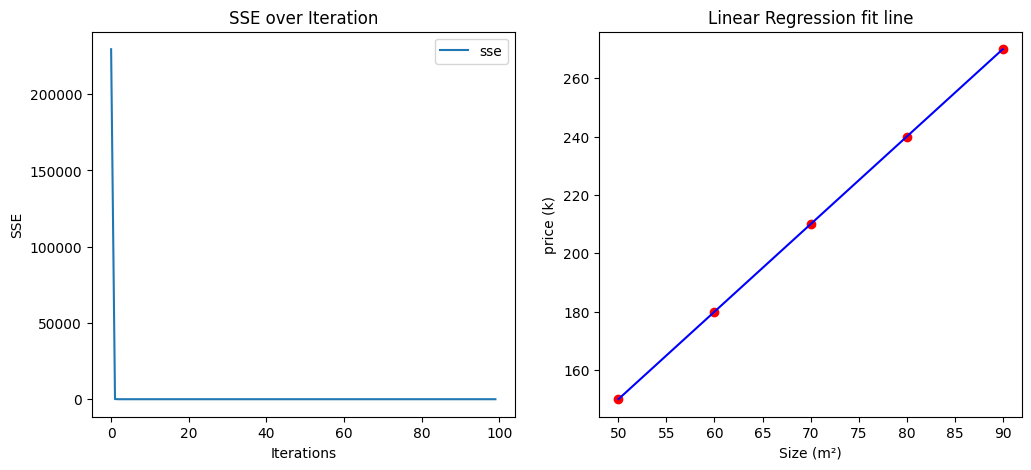

In [15]:
model_1.plot_training(x, y)

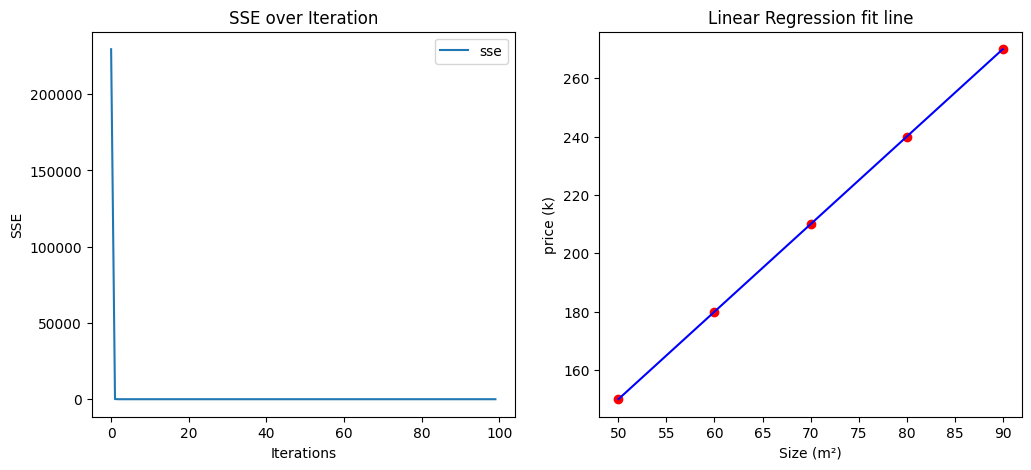

In [16]:
model_2.plot_training(x, y)

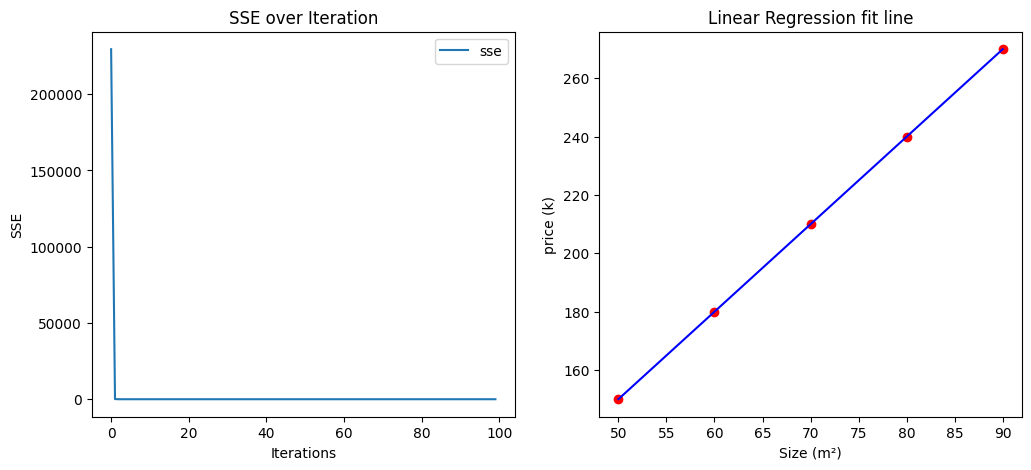

In [17]:
model_3.plot_training(x, y)

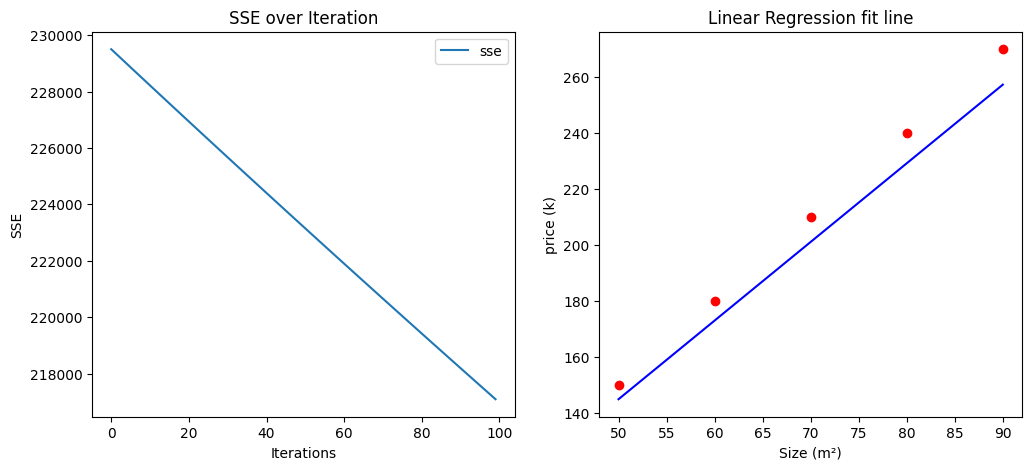

In [17]:
model_4.plot_training(x, y)

## Trying Learning rate 

In [ ]:
model_large_lr = Regression(learning_rate=0.1, n_iters=100)
model_large_lr.fit(x, y, model_name="Linear Regression")
print("Final SSE (large lr) =", model_large_lr.sse_values[-1])

model_small_lr = Regression(learning_rate=0.00001, n_iters=100)
model_small_lr.fit(x, y, model_name="Linear Regression")
print("Final SSE (small lr) =", model_small_lr.sse_values[-1])


Optimixed param : slop = -2.007459532378114e+301, bias =-2.7553577959884946e+299
Final SSE (large lr) = inf
Optimixed param : slop = 2.9993713328364127, bias =0.04116492950170943
Final SSE (small lr) = 0.00046041150816733306


C:\Users\Mostafa\AppData\Local\Temp\ipykernel_4816\3736841201.py:47: RuntimeWarning: overflow encountered in square
  sse = np.sum((y_hat - y)**2)


## Bonus

In [ ]:
model = Regression(learning_rate=0.001, n_iters=100)
model.fit(x, y, model_name="Linear Regression")
print("MSE =", model.mean_squared_error(x, y))


Optimixed param : slop = -7.326427288635144e+96, bias =-1.0055957901462392e+95
MSE = 2.7385349181421895e+197


In [ ]:
model = Regression(learning_rate=0.0001, n_iters=100)
model.fit(x, y, model_name="Linear Regression")
print("MSE =", model.mean_squared_error(x, y))


Optimixed param : slop = 2.999435373457505, bias =0.04113676040970018
MSE = 6.636208076299688e-05


In [ ]:
X_norm = (x - x.min()) / (x.max() - x.min())

model_norm = Regression(learning_rate=0.001, n_iters=100)
model_norm.fit(X_norm, y, model_name="Normalized Linear Regression")

print("Theta 0 (normalized) =", model_norm.theta_0)
print("Theta 1 (normalized) =", model_norm.theta_1)
print("MSE (normalized) =", model_norm.mean_squared_error(X_norm, y))


Optimixed param : slop = 21.262800853039618, bias =37.07395010078988
Theta 0 (normalized) = 21.262800853039618
Theta 1 (normalized) = 37.07395010078988
MSE (normalized) = 27558.182559386732


In [ ]:
class LinearRegressionGDMulti:
    """ 
    Linear Regression using Gradient Descent optimization algorithm.
    Parameters:
    learning_rate: The step size for updating the parameters.
    n_iters: The number of iterations to perform for gradient descent.
    Attributes:
    thetas: A numpy array containing the parameters (theta_0, theta_1, ..., theta_n) of the regression model.
    sse_values: A list to store the sum of squared errors (SSE) for each iteration.
    Methods:
    fit(x, y): Trains the model using the provided training data (x and y).
    predict(x): Predicts the target values for the given input data x using the learned parameters.
    mean_squared_error(x, y): Calculates and returns the mean squared error of the model on the given data.
    """
    def __init__(self ,learning_rate = .001 ,n_iters = 100):
        
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.thetas = None
        self.sse_values = []


    def fit(self,x,y):
        """ 
        Trains the linear regression model using gradient descent optimization.
        Parameters:
        x: A numpy array of shape (n_samples, n_features) representing the input features (e.g., size of the house, number of rooms).
        y: A numpy array of shape (n_samples,) representing the target values (e.g., price of the house).
        The method iteratively updates the parameters (theta_0, theta_1, ..., theta_n) to minimize the sum of squared errors (SSE) between the predicted values and the actual target values.
        """
        x = np.array(x)
        n_samples, n_features = x.shape
        self.thetas = np.zeros(n_features + 1)
        

        for i in range(self.n_iters):
            y_hat = np.dot(x, self.thetas[1:]) + self.thetas[0]

            D_0 = 2/n_samples * np.sum((y_hat-y))
            D_1 = 2/n_samples * np.dot(x.T, y_hat-y)

            self.thetas[1:] -= self.learning_rate * D_1
            self.thetas[0] -= self.learning_rate * D_0
            
            sse = np.sum((y_hat - y)**2)
            self.sse_values.append(sse)
        
        print(f"Optimixed param : slop = {self.thetas[1]}, bias ={self.thetas[0]}")

    def predict(self, x):
        """ 
        Predicts the target values for the given input data x using the learned parameters.
        Parameters:
        x: A numpy array of shape (n_samples, n_features) representing the input features for which predictions are to be made.
        Returns:
        A numpy array of shape (n_samples,) containing the predicted target values based on the learned multi-linear regression model.
        """
        x = np.array(x)
        return np.dot(x, self.thetas[1:]) + self.thetas[0] 

    def mean_squared_error(self, x, y):
        """ 
        Calculates and returns the mean squared error (MSE) of the model on the given data.
        Parameters:
        x: A numpy array of shape (n_samples, n_features) representing the input features (e.g., size of the house, number of rooms).
        y: A numpy array of shape (n_samples,) representing the actual target values (e.g., price of the house).
        Returns:
        A float representing the mean squared error of the model's predictions compared to the actual target values.
        The method computes the predicted values using the current model parameters and then calculates the MSE by averaging the squared differences between the predicted values and the actual target values.
        """
        y_pred = self.predict(x)
        mse = np.mean((y - y_pred)**2)
        return mse
        

In [ ]:
X_multi = np.array([[50, 2], [60, 3], [70, 2], [80, 4], [90, 5]])  
y = np.array([150, 180, 210, 240, 270])

model_multi = LinearRegressionGDMulti(learning_rate=0.001, n_iters=100)
model_multi.fit(X_multi, y)
print("Predicted price =", model_multi.predict([[75, 3]]))
print("MSE =", model_multi.mean_squared_error(X_multi, y))


Optimixed param : slop = -9.303977074038199e+96, bias =-1.2769696294827143e+95
Predicted price = [-6.99228655e+98]
MSE = 4.4356828980064266e+197


In [ ]:
X_multi = np.array([[50, 2], [60, 3], [70, 2], [80, 4], [90, 5]])  
y = np.array([150, 180, 210, 240, 270])

model_multi = LinearRegressionGDMulti(learning_rate=0.0001, n_iters=100)
model_multi.fit(X_multi, y)
print("Predicted price =", model_multi.predict([[75, 3]]))
print("MSE =", model_multi.mean_squared_error(X_multi, y))


Optimixed param : slop = 2.992976311519492, bias =0.041231657237521244
Predicted price = [224.92955984]
MSE = 0.008751234235356137
